In [1]:
import xgboost
print(xgboost.__version__)

3.1.3



Dataset Shape: (614, 13)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural         

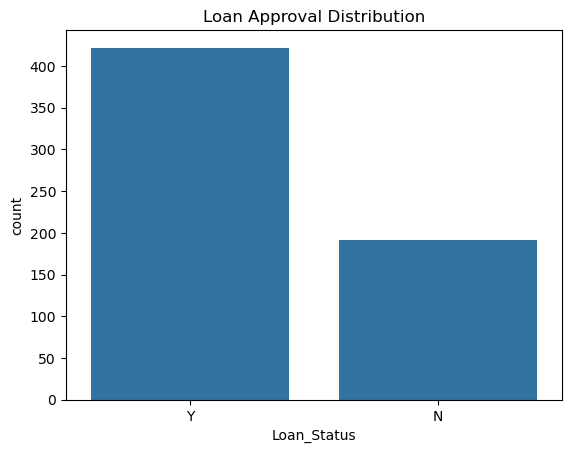


Class Distribution After SMOTE: [316 316]

Logistic Regression
----------------------------------------
Accuracy : 0.8246753246753247
F1 Score : 0.8767123287671232
ROC-AUC  : 0.8486635220125787

Decision Tree
----------------------------------------
Accuracy : 0.7727272727272727
F1 Score : 0.8387096774193549
ROC-AUC  : 0.7385023584905661

Random Forest
----------------------------------------
Accuracy : 0.8051948051948052
F1 Score : 0.8598130841121495
ROC-AUC  : 0.8145636792452831

XGBoost
----------------------------------------
Accuracy : 0.7857142857142857
F1 Score : 0.8405797101449275
ROC-AUC  : 0.8201650943396227


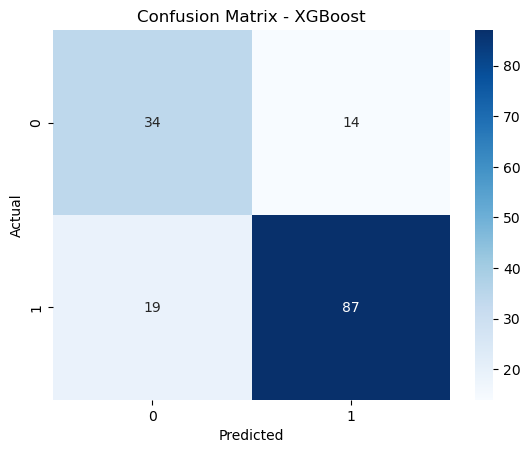


PROJECT EXECUTION COMPLETED SUCCESSFULLY


In [3]:
# =========================================================
# LOAN APPROVAL PREDICTION - COMPLETE ONE FILE PROJECT
# =========================================================

# -------------------------------
# 1. IMPORT LIBRARIES
# -------------------------------
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# -------------------------------
# 2. LOAD DATASET
# -------------------------------
df = pd.read_csv("train.csv")

print("\nDataset Shape:", df.shape)
print(df.head())

# -------------------------------
# 3. EXPLORATORY DATA ANALYSIS
# -------------------------------
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Approval Distribution")
plt.show()

# -------------------------------
# 4. HANDLE MISSING VALUES
# -------------------------------
# Numerical
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


# -------------------------------
# 5. ENCODE CATEGORICAL VARIABLES
# -------------------------------
le = LabelEncoder()

categorical_cols = [
    'Gender', 'Married', 'Dependents',
    'Education', 'Self_Employed',
    'Property_Area', 'Loan_Status'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# -------------------------------
# 6. SPLIT FEATURES & TARGET
# -------------------------------
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# -------------------------------
# 7. TRAIN TEST SPLIT
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# -------------------------------
# 8. HANDLE CLASS IMBALANCE (SMOTE)
# -------------------------------
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\nClass Distribution After SMOTE:", np.bincount(y_train))

# -------------------------------
# 9. FEATURE SCALING
# -------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =========================================================
# MODEL TRAINING & EVALUATION
# =========================================================

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{name}")
    print("-" * 40)
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_prob))

    return y_pred

# -------------------------------
# 10. LOGISTIC REGRESSION
# -------------------------------
lr = LogisticRegression(max_iter=1000)
pred_lr = evaluate_model("Logistic Regression", lr)

# -------------------------------
# 11. DECISION TREE
# -------------------------------
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
pred_dt = evaluate_model("Decision Tree", dt)

# -------------------------------
# 12. RANDOM FOREST
# -------------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
pred_rf = evaluate_model("Random Forest", rf)

# -------------------------------
# 13. XGBOOST
# -------------------------------
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)
pred_xgb = evaluate_model("XGBoost", xgb)

# -------------------------------
# 14. CONFUSION MATRIX (BEST MODEL)
# -------------------------------
cm = confusion_matrix(y_test, pred_xgb)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nPROJECT EXECUTION COMPLETED SUCCESSFULLY")